# Financial News and Stock Price Integration Dataset - EDA
This notebook performs comprehensive Exploratory Data Analysis (EDA) on the FNSPID dataset.
## Dataset Description
- **headline**: Article release headline/title
- **url**: Direct link to the full news article
- **publisher**: Author/creator of article
- **date**: Publication date and time (UTC-4 timezone)
- **stock**: Stock ticker symbol

In [62]:
# Import required libraries
import sys
import os
sys.path.append('../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
# Import custom modules
from data_loader import FinancialDataLoader
from eda_analyzer import FinancialEDAAnalyzer
from text_analyzer import FinancialTextAnalyzer
from simple_text_analyzer import SimpleFinancialTextAnalyzer
from time_series_analyzer import FinancialTimeSeriesAnalyzer
from publisher_analyzer import FinancialPublisherAnalyzer
from utils import save_analysis_results, format_large_numbers, get_data_quality_report

FinancialTextAnalyzer = SimpleFinancialTextAnalyzer

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Data Loading and Initial Exploration

In [63]:
# Initialize data loader
data_path = "../data/raw_analyst_ratings.csv"
loader = FinancialDataLoader(data_path)

# Load the dataset
print("Loading dataset...")
df = loader.load_data()
print(f"Dataset loaded successfully! Shape: {df.shape}")

INFO:data_loader:Loading data from ../data/raw_analyst_ratings.csv


Loading dataset...


INFO:data_loader:Data loaded successfully. Shape: (1407328, 6)


Dataset loaded successfully! Shape: (1407328, 6)


In [64]:
# Get basic dataset information
data_info = loader.get_data_info()
print("Dataset Information:")
print(f"Shape: {data_info['shape']}")
print(f"Columns: {data_info['columns']}")
print(f"Memory Usage: {data_info['memory_usage'] / (1024**2):.2f} MB")
print("Data Types:")
for col, dtype in data_info['dtypes'].items():
    print(f"  {col}: {dtype}")

Dataset Information:
Shape: (1407328, 6)
Columns: ['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock']
Memory Usage: 634.55 MB
Data Types:
  Unnamed: 0: int64
  headline: object
  url: object
  publisher: object
  date: object
  stock: object


In [65]:
# Display sample data
print("Sample Data:")
sample_data = loader.get_sample_data(5)
display(sample_data)

Sample Data:


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


## 2. Data Quality Assessment

In [66]:
# Generate data quality report
quality_report = get_data_quality_report(df)
print("Data Quality Report:")
print(f"Total Rows: {format_large_numbers(quality_report['total_rows'])}")
print(f"Total Columns: {quality_report['total_columns']}")
print(f"Duplicate Rows: {format_large_numbers(quality_report['duplicate_rows'])}")
print(f"Memory Usage: {quality_report['memory_usage_mb']:.2f} MB")
print("Missing Values Analysis:")
for col, missing_info in quality_report['missing_values'].items():
    if missing_info['count'] > 0:
        print(f"  {col}: {format_large_numbers(missing_info['count'])} ({missing_info['percentage']}%)")
    else:
        print(f"  {col}: No missing values")

Data Quality Report:
Total Rows: 1.4M
Total Columns: 6
Duplicate Rows: 0
Memory Usage: 635.59 MB
Missing Values Analysis:
  Unnamed: 0: No missing values
  headline: No missing values
  url: No missing values
  publisher: No missing values
  date: No missing values
  stock: No missing values


## 3. Initialize EDA Analyzer and Perform Analysis

In [67]:
# Initialize EDA analyzer
analyzer = FinancialEDAAnalyzer(df)
print("EDA Analyzer initialized and data prepared successfully!")

INFO:eda_analyzer:Data preparation completed successfully


EDA Analyzer initialized and data prepared successfully!


## 4. Descriptive Statistics for Textual Lengths

In [68]:
# Get descriptive statistics
desc_stats = analyzer.get_descriptive_statistics()
print("Descriptive Statistics for Textual Lengths:")
print("=" * 50)
for text_type, stats in desc_stats.items():
    print(f"{text_type.replace('_', ' ').title()}:")
    print(f"  Count: {format_large_numbers(stats['count'])}")
    print(f"  Mean: {stats['mean']:.2f} characters")
    print(f"  Std: {stats['std']:.2f} characters")
    print(f"  Min: {stats['min']} characters")
    print(f"  Max: {stats['max']} characters")
    print(f"  Median: {stats['median']:.2f} characters")
    print(f"  Q1: {stats['q1']:.2f} characters")
    print(f"  Q3: {stats['q3']:.2f} characters")



Descriptive Statistics for Textual Lengths:
Headline Length:
  Count: 1.4M
  Mean: 73.12 characters
  Std: 40.74 characters
  Min: 3 characters
  Max: 512 characters
  Median: 64.00 characters
  Q1: 47.00 characters
  Q3: 87.00 characters
Url Length:
  Count: 1.4M
  Mean: 110.50 characters
  Std: 19.17 characters
  Min: 33 characters
  Max: 162 characters
  Median: 115.00 characters
  Q1: 94.00 characters
  Q3: 125.00 characters


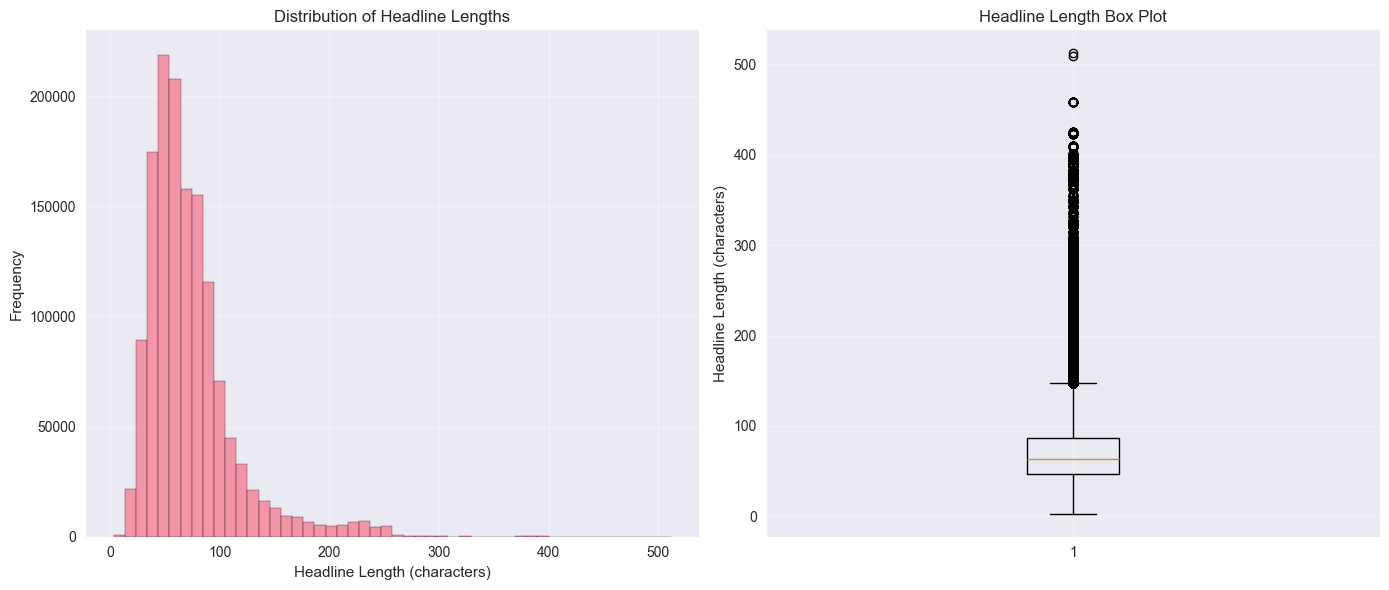

In [69]:
# Visualize headline length distribution
analyzer.plot_headline_length_distribution(figsize=(14, 6))

## 5. Text Analysis and Topic Modeling

In [70]:
# Initialize text analyzer
text_analyzer = FinancialTextAnalyzer(df, text_column='headline')
print("Text Analyzer initialized successfully!")

Text Analyzer initialized successfully!


In [71]:
# Extract common keywords
keywords_df = text_analyzer.extract_common_keywords(30)
print("Top 30 Most Common Keywords in Headlines:")
print("=" * 50)
for idx, row in keywords_df.head(20).iterrows():
    print(f"{idx+1:2d}. {row['keyword']:<20} | {format_large_numbers(row['frequency']):>8} ({row['percentage']:>5.3f}%)")

Top 30 Most Common Keywords in Headlines:
 1. stocks               |   161.8K (1.466%)
 2. est                  |   140.7K (1.275%)
 3. eps                  |   128.9K (1.168%)
 4. shares               |   114.3K (1.036%)
 5. reports              |   108.7K (0.985%)
 6. update               |    91.7K (0.831%)
 7. earnings             |    87.4K (0.792%)
 8. sales                |    79.6K (0.722%)
 9. top                  |    79.6K (0.722%)
10. benzinga             |    74.5K (0.675%)
11. week                 |    69.6K (0.630%)
12. announces            |    66.6K (0.603%)
13. buy                  |    64.4K (0.583%)
14. mid                  |    62.3K (0.564%)
15. downgrades           |    62.0K (0.562%)
16. raises               |    57.8K (0.524%)
17. upgrades             |    56.8K (0.515%)
18. target               |    54.7K (0.496%)
19. maintains            |    53.0K (0.480%)
20. down                 |    50.1K (0.454%)


In [79]:
# Analyze financial phrases and keywords
financial_phrases = text_analyzer.extract_financial_phrases()
print("Financial Phrases and Keywords Analysis:")
print("=" * 50)
for category, data in financial_phrases.items():
    print(f"{category.replace('_', ' ').title()}:")
    print(f"  Total Mentions: {format_large_numbers(data['total_mentions'])}")
    print(f"  Articles Containing: {format_large_numbers(data['articles_containing'])}")
    print(f"  Unique Phrases: {data['unique_phrases']}")
    if data['top_phrases']:
        print(f"  Top Phrases:")
        for phrase, count in list(data['top_phrases'].items())[:3]:
            print(f"    - '{phrase}': {count} mentions")


Financial Phrases and Keywords Analysis:
Earnings:
  Total Mentions: 344.6K
  Articles Containing: 257.3K
  Unique Phrases: 5
  Top Phrases:
    - 'eps': 128396 mentions
    - 'earnings': 86626 mentions
    - 'sales': 77648 mentions
Price Targets:
  Total Mentions: 194.5K
  Articles Containing: 192.9K
  Unique Phrases: 5
  Top Phrases:
    - 'pt': 140390 mentions
    - 'price target': 47634 mentions
    - 'downgraded': 3263 mentions
Mergers Acquisitions:
  Total Mentions: 39.4K
  Articles Containing: 38.4K
  Unique Phrases: 5
  Top Phrases:
    - 'deal': 20840 mentions
    - 'acquisition': 8911 mentions
    - 'merger': 5621 mentions
Regulatory:
  Total Mentions: 63.5K
  Articles Containing: 60.2K
  Unique Phrases: 5
  Top Phrases:
    - 'sec': 43644 mentions
    - 'fda': 11382 mentions
    - 'approval': 5880 mentions
Financial Performance:
  Total Mentions: 59.0K
  Articles Containing: 57.8K
  Unique Phrases: 5
  Top Phrases:
    - 'outlook': 16001 mentions
    - 'beats': 15754 mention

In [87]:
# Analyze sentiment keywords
sentiment_analysis = text_analyzer.sentiment_keyword_analysis()
print("Sentiment Analysis of Headlines:")
print("=" * 40)
sentiment_dist = sentiment_analysis['sentiment_distribution']
total_sentiment = sum(sentiment_dist.values())
for sentiment, count in sentiment_dist.items():
    percentage = (count / len(df)) * 100 if len(df) > 0 else 0
    print(f"{sentiment.title()}: {format_large_numbers(count)} articles ({percentage:.2f}%)")
print("Top Sentiment Keywords:")
for sentiment, keywords in sentiment_analysis['sentiment_keywords'].items():
    if keywords:
        print(f"{sentiment.title()}:")
        for word, count in list(keywords.items())[:5]:
            print(f"  - '{word}': {count} mentions")

Sentiment Analysis of Headlines:
Positive: 327.3K articles (23.26%)
Negative: 95.1K articles (6.75%)
Neutral: 69.9K articles (4.96%)
Top Sentiment Keywords:
Positive:
  - 'up': 258059 mentions
  - 'gain': 30097 mentions
  - 'rise': 16697 mentions
  - 'beats': 15754 mentions
  - 'strong': 10714 mentions
Negative:
  - 'down': 63828 mentions
  - 'fall': 7194 mentions
  - 'weak': 6362 mentions
  - 'misses': 5624 mentions
  - 'decline': 5015 mentions
Neutral:
  - 'maintain': 43356 mentions
  - 'hold': 28284 mentions
  - 'flat': 2483 mentions
  - 'stable': 725 mentions
  - 'steady': 541 mentions


In [95]:
# Analyze bigrams and trigrams
bigrams_df = text_analyzer.analyze_ngrams(2, 15)
trigrams_df = text_analyzer.analyze_ngrams(3, 10)
print("Top Bigrams (Two-word phrases):")
print("=" * 35)
for idx, row in bigrams_df.head(10).iterrows():
    print(f"{idx+1:2d}. '{row['2gram']}'  | {format_large_numbers(row['frequency'])} occurrences")
print("Top Trigrams (Three-word phrases):")
print("=" * 38)
for idx, row in trigrams_df.head(8).iterrows():
    print(f"{idx+1:2d}. '{row['3gram']}'  | {format_large_numbers(row['frequency'])} occurrences")

Top Bigrams (Two-word phrases):
 1. 'eps est'  | 61.3K occurrences
 2. 'reports eps'  | 51.6K occurrences
 3. 'benzinga top'  | 44.3K occurrences
 4. 'stocks moving'  | 40.0K occurrences
 5. 'mid day'  | 37.3K occurrences
 6. 'earnings scheduled'  | 32.1K occurrences
 7. 'initiates coverage'  | 29.0K occurrences
 8. 'sales est'  | 27.2K occurrences
 9. 'shares several'  | 24.1K occurrences
10. 'adj eps'  | 21.7K occurrences
Top Trigrams (Three-word phrases):
 1. 'reports eps est'  | 35.6K occurrences
 2. 'benzinga top upgrades'  | 21.1K occurrences
 3. 'stocks hit week'  | 19.9K occurrences
 4. 'set new week'  | 16.8K occurrences
 5. 'stocks which set'  | 16.6K occurrences
 6. 'which set new'  | 16.6K occurrences
 7. 'est sales est'  | 16.3K occurrences
 8. 'eps est sales'  | 15.5K occurrences


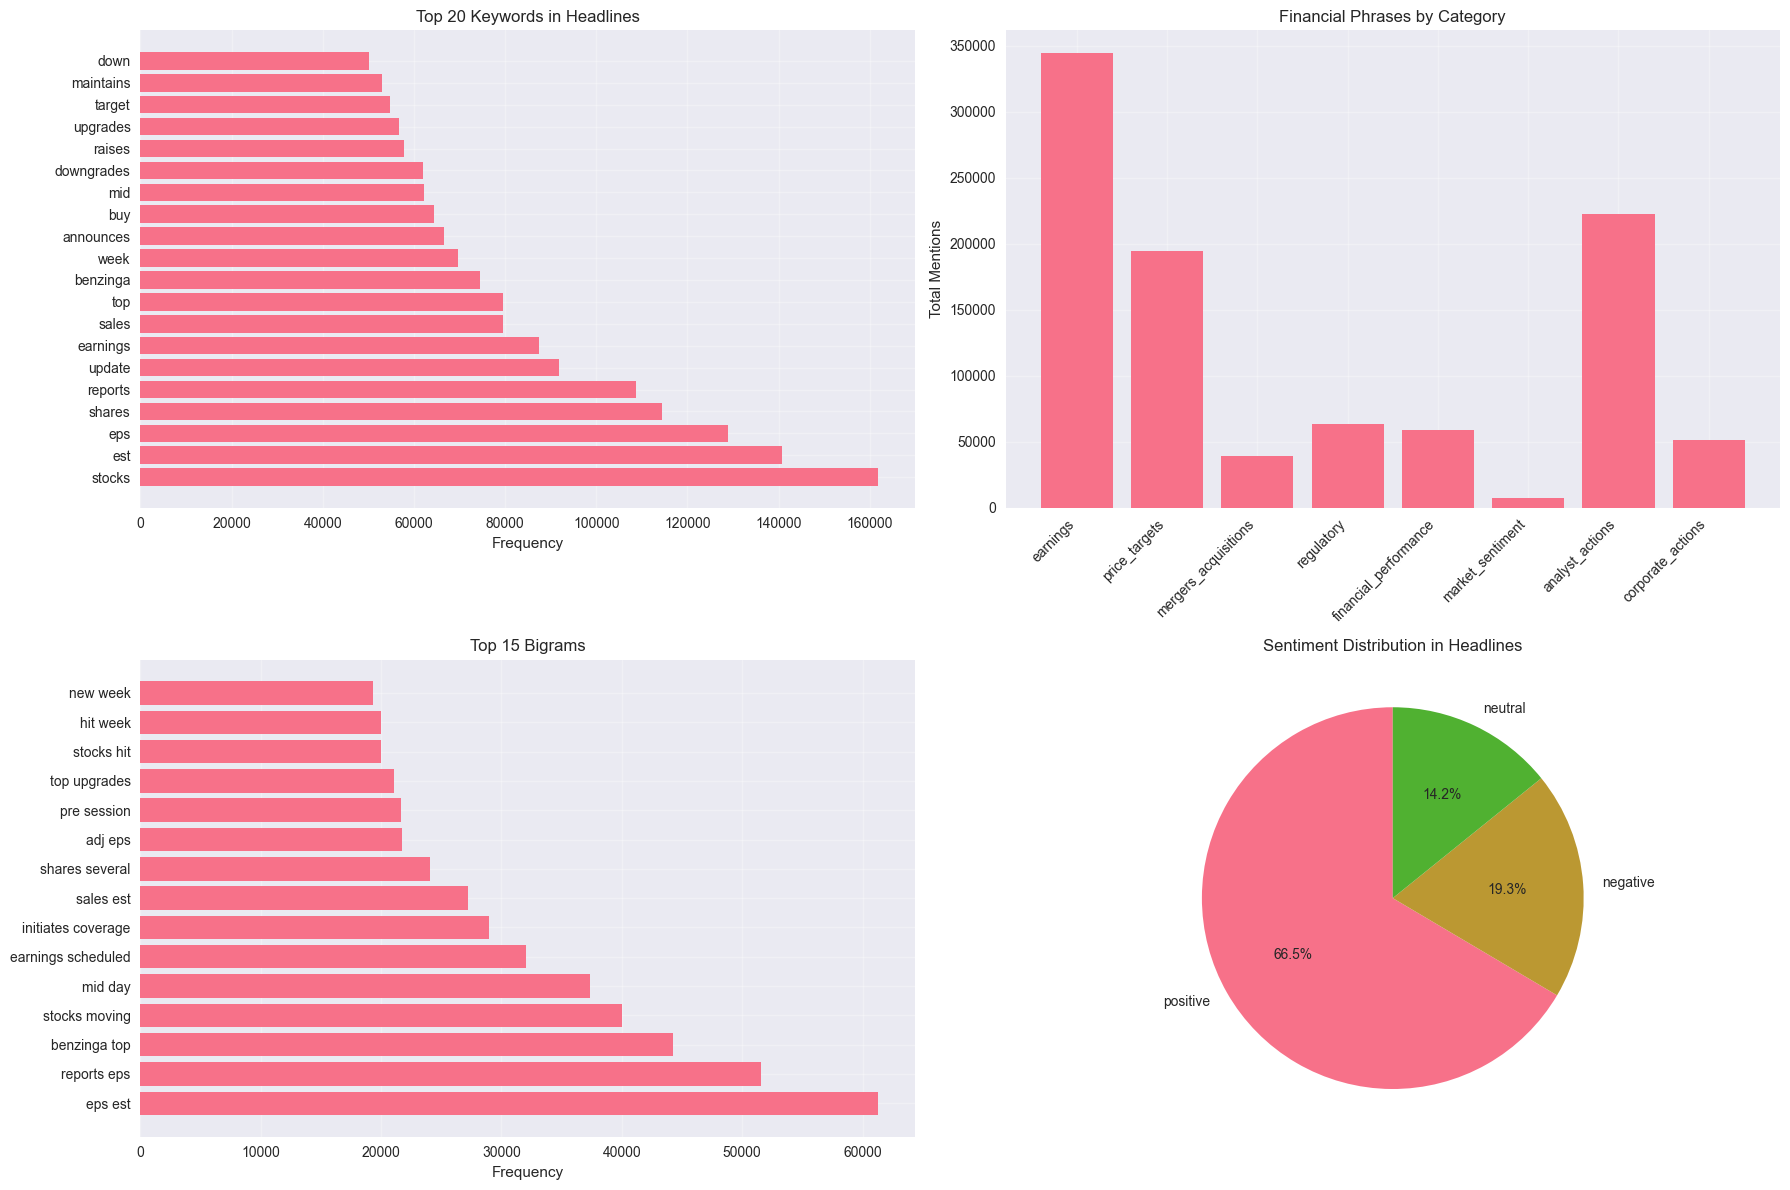

In [103]:
# Comprehensive text analysis visualizations
text_analyzer.plot_keyword_analysis(figsize=(18, 12))

## 6. Time Series Analysis

In [111]:
# Initialize time series analyzer
ts_analyzer = FinancialTimeSeriesAnalyzer(df, date_column='date')
print("Time Series Analyzer initialized successfully!")

INFO:time_series_analyzer:Time series data preparation completed successfully


Time Series Analyzer initialized successfully!


In [119]:
# Analyze publication frequency patterns
freq_analysis = ts_analyzer.analyze_publication_frequency()
print("Publication Frequency Analysis:")
print("=" * 40)
print(f"Daily Statistics:")
daily_stats = freq_analysis['daily']
print(f"  Average articles per day: {daily_stats['avg_daily']:.2f}")
print(f"  Standard deviation: {daily_stats['std_daily']:.2f}")
print(f"  Maximum articles in a day: {format_large_numbers(daily_stats['max_daily'])}")
print(f"  Minimum articles in a day: {daily_stats['min_daily']}")
print(f"  Total days with data: {format_large_numbers(daily_stats['total_days'])}")
print(f"Weekly Statistics:")
weekly_stats = freq_analysis['weekly']
print(f"  Average articles per week: {weekly_stats['avg_weekly']:.2f}")
print(f"  Maximum articles in a week: {format_large_numbers(weekly_stats['max_weekly'])}")
print(f"Monthly Statistics:")
monthly_stats = freq_analysis['monthly']
print(f"  Average articles per month: {monthly_stats['avg_monthly']:.2f}")
print(f"  Maximum articles in a month: {format_large_numbers(monthly_stats['max_monthly'])}")

Publication Frequency Analysis:
Daily Statistics:
  Average articles per day: 22.15
  Standard deviation: 68.14
  Maximum articles in a day: 973
  Minimum articles in a day: 1
  Total days with data: 2.5K
Weekly Statistics:
  Average articles per week: 116.16
  Maximum articles in a week: 3.1K
Monthly Statistics:
  Average articles per month: 504.39
  Maximum articles in a month: 9.3K


In [127]:
# Detect publication spikes (potential market events)
spike_analysis = ts_analyzer.detect_publication_spikes(threshold_std=2.0)
print("Publication Spikes Analysis (Potential Market Events):")
print("=" * 60)
print(f"Spike Detection Threshold: {spike_analysis['threshold_used']:.1f} articles/day")
print(f"Mean Daily Articles: {spike_analysis['mean_daily_articles']:.1f}")
print(f"Total Spike Days: {spike_analysis['total_spike_days']}")
print(f"Spike Days Percentage: {spike_analysis['spike_percentage']:.2f}%")
print("Top 10 Spike Days:")
for idx, spike_day in enumerate(spike_analysis['top_spike_days'][:10], 1):
    print(f"{idx:2d}. {spike_day['date']} | {format_large_numbers(spike_day['article_count'])} articles")
if spike_analysis['spike_day_of_week_distribution']:
    print("Spike Day Distribution by Day of Week:")
    for day, count in spike_analysis['spike_day_of_week_distribution'].items():
        print(f"  {day}: {count} spike days")

Publication Spikes Analysis (Potential Market Events):
Spike Detection Threshold: 158.4 articles/day
Mean Daily Articles: 22.1
Total Spike Days: 51
Spike Days Percentage: 2.02%
Top 10 Spike Days:
 1. 2020-03-12 00:00:00 | 973 articles
 2. 2020-06-05 00:00:00 | 932 articles
 3. 2020-06-10 00:00:00 | 806 articles
 4. 2020-06-09 00:00:00 | 804 articles
 5. 2020-06-08 00:00:00 | 765 articles
 6. 2020-05-07 00:00:00 | 749 articles
 7. 2020-06-03 00:00:00 | 720 articles
 8. 2020-03-19 00:00:00 | 629 articles
 9. 2020-05-26 00:00:00 | 628 articles
10. 2020-05-13 00:00:00 | 549 articles
Spike Day Distribution by Day of Week:
  Thursday: 13 spike days
  Friday: 10 spike days
  Wednesday: 10 spike days
  Tuesday: 9 spike days
  Monday: 9 spike days


In [135]:
# Intraday patterns analysis
intraday_analysis = ts_analyzer.analyze_intraday_patterns()
print("Intraday Publication Patterns:")
print("=" * 35)
print(f"Market Hours (9 AM - 4 PM): {format_large_numbers(intraday_analysis['market_hours_articles'])} articles ({intraday_analysis['market_hours_percentage']:.1f}%)")
print(f"Pre-Market (4 AM - 9 AM): {format_large_numbers(intraday_analysis['pre_market_articles'])} articles")
print(f"After-Market (4 PM - 12 AM): {format_large_numbers(intraday_analysis['after_market_articles'])} articles")
print(f"Overnight (12 AM - 4 AM): {format_large_numbers(intraday_analysis['overnight_articles'])} articles")
if 'peak_minute_analysis' in intraday_analysis and intraday_analysis['peak_minute_analysis']:
    peak_analysis = intraday_analysis['peak_minute_analysis']
    if 'minute_category_distribution' in peak_analysis:
        print("Minute Pattern Distribution:")
        for category, count in peak_analysis['minute_category_distribution'].items():
            print(f"  {category.replace('_', ' ').title()}: {format_large_numbers(count)} articles")

Intraday Publication Patterns:
Market Hours (9 AM - 4 PM): 35.4K articles (63.2%)
Pre-Market (4 AM - 9 AM): 16.3K articles
After-Market (4 PM - 12 AM): 4.0K articles
Overnight (12 AM - 4 AM): 231 articles
Minute Pattern Distribution:
  Half Hour: 723 articles
  On Hour: 657 articles
  Other: 32.8K articles
  Quarter Hour: 1.2K articles


In [143]:
# Seasonal patterns analysis
seasonal_analysis = ts_analyzer.analyze_seasonal_patterns()
print("Seasonal Publication Patterns:")
print("=" * 35)
print("Quarterly Distribution:")
for quarter_data in seasonal_analysis['quarterly_patterns']:
    print(f"  Q{quarter_data['quarter']}: {format_large_numbers(quarter_data['avg_articles'])} articles")
print("Monthly Distribution (Top 6):")
monthly_sorted = sorted(seasonal_analysis['monthly_patterns'], key=lambda x: x['avg_articles'], reverse=True)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for month_data in monthly_sorted[:6]:
    month_name = months[month_data['month'] - 1]
    print(f"  {month_name}: {format_large_numbers(month_data['avg_articles'])} articles")

Seasonal Publication Patterns:
Quarterly Distribution:
  Q1: 13.6K articles
  Q2: 25.8K articles
  Q3: 7.4K articles
  Q4: 9.2K articles
Monthly Distribution (Top 6):
  May: 11.4K articles
  Jun: 8.0K articles
  Apr: 6.5K articles
  Mar: 6.4K articles
  Feb: 4.1K articles
  Nov: 3.2K articles


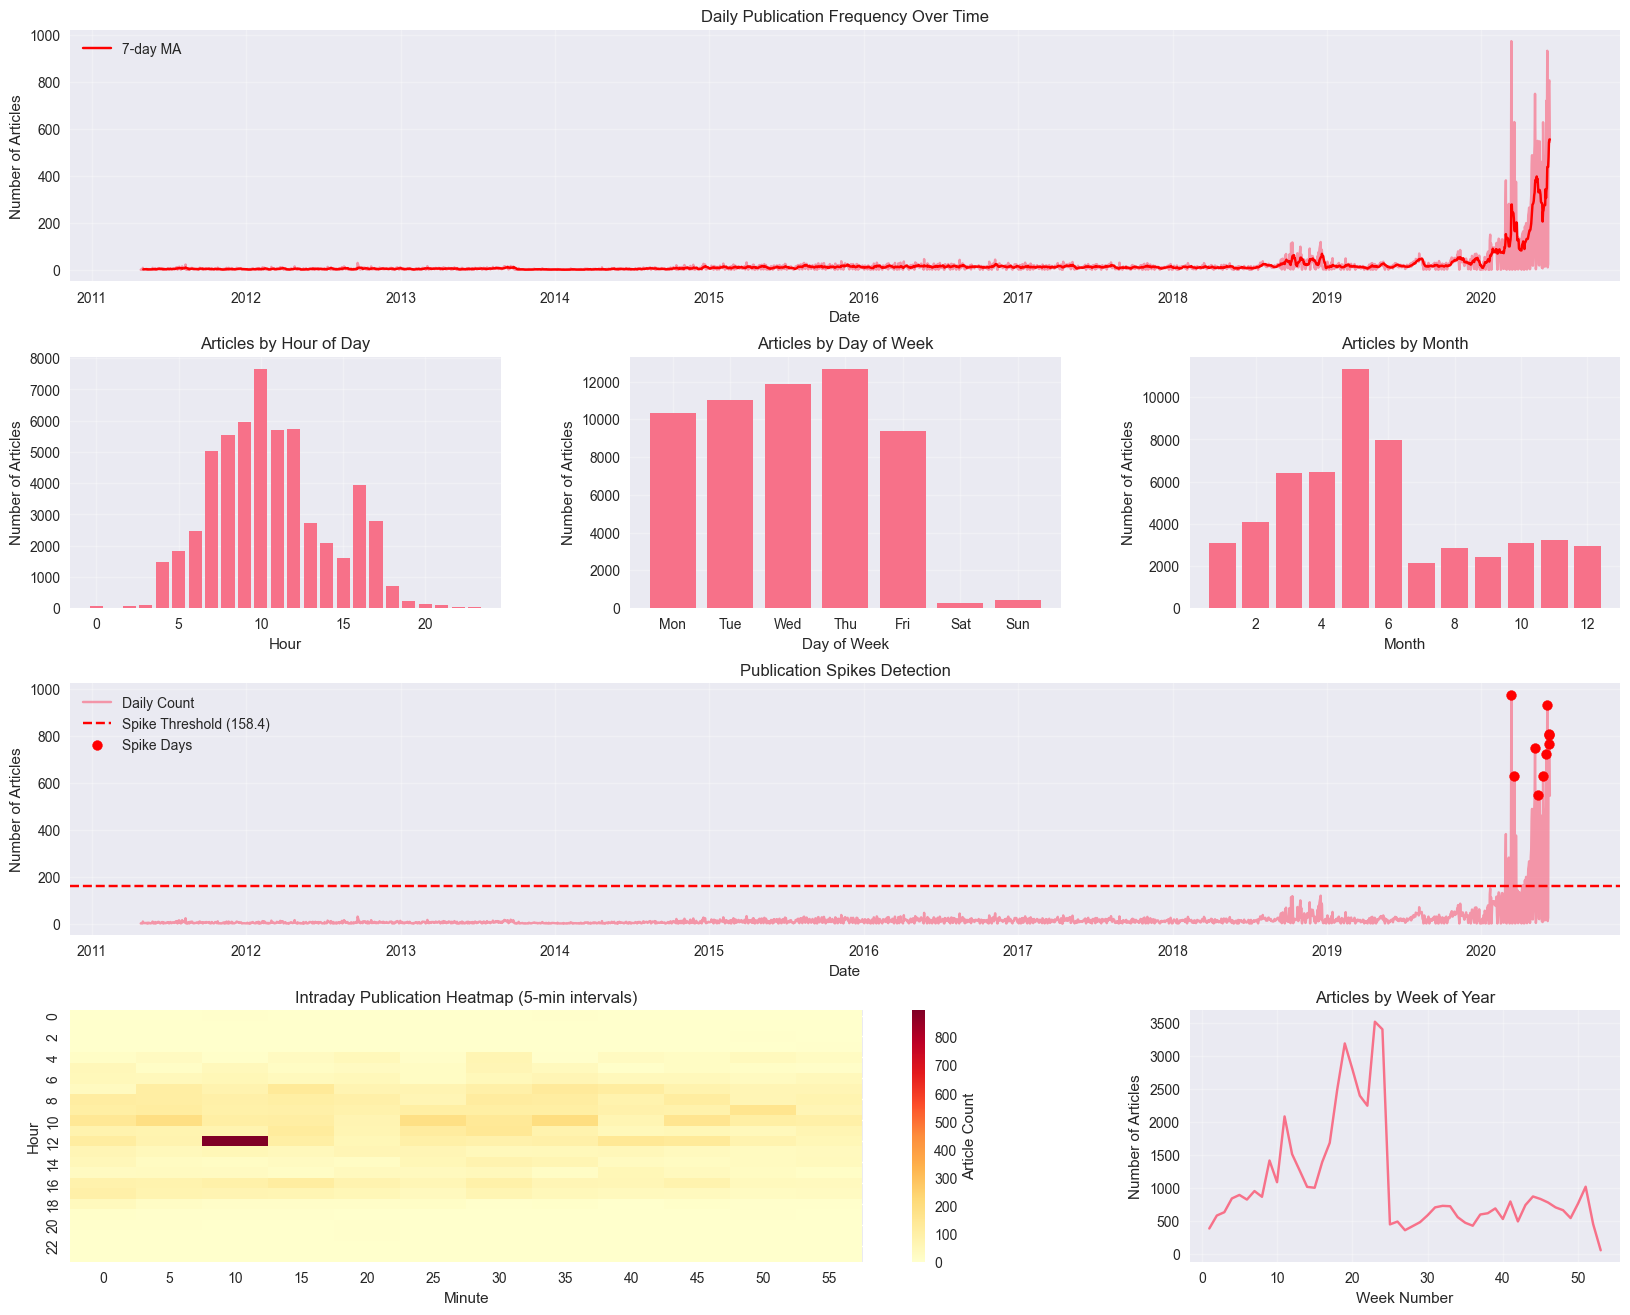

In [151]:
# Comprehensive time series visualizations
ts_analyzer.plot_time_series_analysis(figsize=(20, 16))

## 7. Publisher Analysis

In [152]:
# Analyze publishers
publisher_analysis = analyzer.analyze_publishers()
print("Publisher Analysis - Most Active Publishers:")
print("=" * 60)
print(f"Total Publishers: {len(publisher_analysis)}")
print(f"Total Articles: {format_large_numbers(publisher_analysis['article_count'].sum())}")
print("Top 15 Most Active Publishers:")
top_publishers = publisher_analysis.head(15)
for idx, row in top_publishers.iterrows():
    print(f"{idx+1:2d}. {row['publisher']:<30} | {format_large_numbers(row['article_count']):>8} articles ({row['percentage']:>5.2f}%)")

Publisher Analysis - Most Active Publishers:
Total Publishers: 1034
Total Articles: 1.4M
Top 15 Most Active Publishers:
 1. Paul Quintaro                  |   228.4K articles (16.23%)
 2. Lisa Levin                     |   187.0K articles (13.29%)
 3. Benzinga Newsdesk              |   150.5K articles (10.69%)
 4. Charles Gross                  |    96.7K articles ( 6.87%)
 5. Monica Gerson                  |    82.4K articles ( 5.85%)
 6. Eddie Staley                   |    57.3K articles ( 4.07%)
 7. Hal Lindon                     |    49.0K articles ( 3.49%)
 8. ETF Professor                  |    28.5K articles ( 2.02%)
 9. Juan Lopez                     |    28.4K articles ( 2.02%)
10. Benzinga Staff                 |    28.1K articles ( 2.00%)
11. Vick Meyer                     |    24.8K articles ( 1.76%)
12. webmaster                      |    20.3K articles ( 1.44%)
13. Benzinga_Newsdesk              |    19.4K articles ( 1.38%)
14. Zacks                          |    19.4K ar

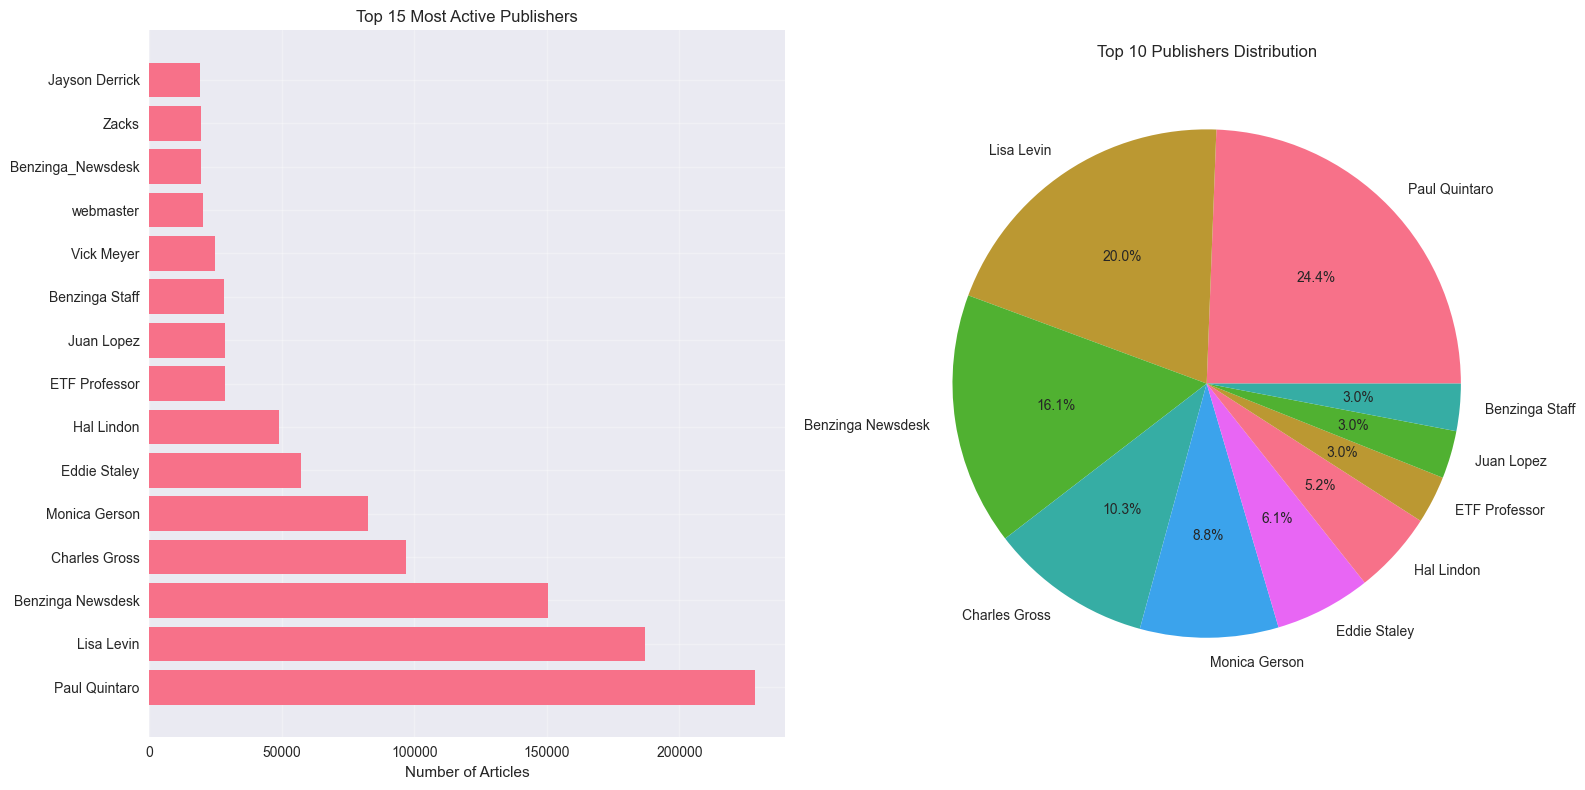

In [153]:
# Visualize publisher analysis
analyzer.plot_publisher_analysis(top_n=15, figsize=(16, 8))

## 8. Publication Date Trends Analysis

In [154]:
# Analyze publication trends
trends = analyzer.analyze_publication_trends()
print("Publication Trends Analysis:")
print("=" * 40)
# Day of week trends
print("Articles by Day of Week:")
dow_trends = trends['day_of_week_trends']
for _, row in dow_trends.iterrows():
    print(f"{row['day_of_week']:<10}: {format_large_numbers(row['article_count']):>8} articles")
# Find busiest and quietest days
busiest_day = dow_trends.loc[dow_trends['article_count'].idxmax()]
quietest_day = dow_trends.loc[dow_trends['article_count'].idxmin()]
print(f"Busiest Day: {busiest_day['day_of_week']} ({format_large_numbers(busiest_day['article_count'])} articles)")
print(f"Quietest Day: {quietest_day['day_of_week']} ({format_large_numbers(quietest_day['article_count'])} articles)")

Publication Trends Analysis:
Articles by Day of Week:
Monday    :    10.3K articles
Tuesday   :    11.0K articles
Wednesday :    11.9K articles
Thursday  :    12.7K articles
Friday    :     9.4K articles
Saturday  :      267 articles
Sunday    :      436 articles
Busiest Day: Thursday (12.7K articles)
Quietest Day: Saturday (267 articles)


In [155]:
# Hourly trends analysis
hourly_trends = trends['hourly_trends']
print("Articles by Hour of Day (Top 10 Active Hours):")
top_hours = hourly_trends.nlargest(10, 'article_count')
for _, row in top_hours.iterrows():
    hour_str = f"{int(row['hour']):02d}:00"
    print(f"{hour_str}: {format_large_numbers(row['article_count']):>8} articles")
# Peak hours
peak_hour = hourly_trends.loc[hourly_trends['article_count'].idxmax()]
low_hour = hourly_trends.loc[hourly_trends['article_count'].idxmin()]
print(f"Peak Hour: {int(peak_hour['hour']):02d}:00 ({format_large_numbers(peak_hour['article_count'])} articles)")
print(f"Lowest Hour: {int(low_hour['hour']):02d}:00 ({format_large_numbers(low_hour['article_count'])} articles)")

Articles by Hour of Day (Top 10 Active Hours):
10:00:     7.7K articles
09:00:     6.0K articles
12:00:     5.7K articles
11:00:     5.7K articles
08:00:     5.5K articles
07:00:     5.0K articles
16:00:     3.9K articles
17:00:     2.8K articles
13:00:     2.7K articles
06:00:     2.5K articles
Peak Hour: 10:00 (7.7K articles)
Lowest Hour: 01:00 (14.0 articles)


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


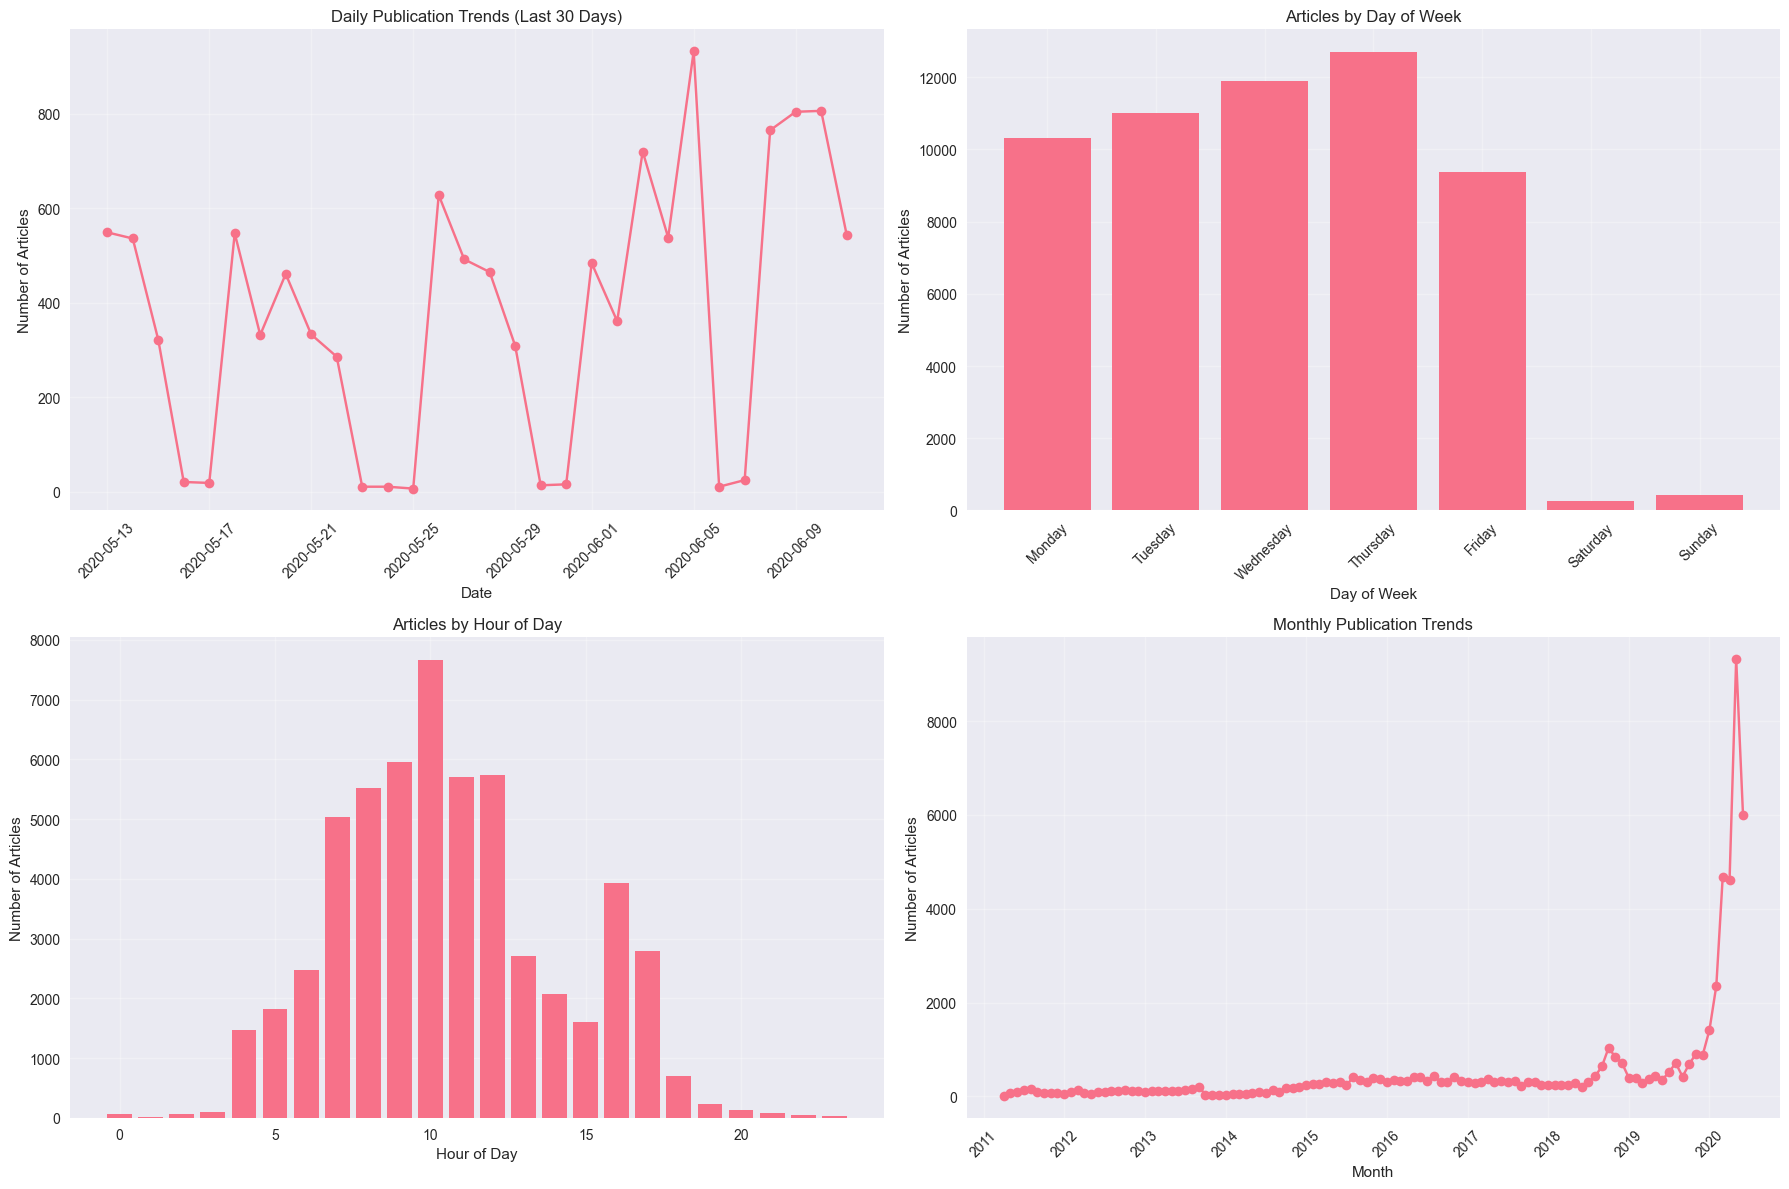

In [156]:
# Visualize temporal trends
analyzer.plot_temporal_trends(figsize=(18, 12))

## 9. Advanced Publisher Analysis

In [159]:
# Initialize publisher analyzer
publisher_analyzer = FinancialPublisherAnalyzer(df, publisher_column='publisher', url_column='url')
print("Publisher Analyzer initialized successfully!")

INFO:publisher_analyzer:Publisher data preparation completed successfully


Publisher Analyzer initialized successfully!


In [162]:
# Analyze publisher activity patterns
publisher_activity = publisher_analyzer.analyze_publisher_activity()
print("Publisher Activity Analysis:")
print("=" * 35)
print(f"Total Publishers: {format_large_numbers(publisher_activity['total_publishers'])}")
print(f"Single-Article Publishers: {format_large_numbers(publisher_activity['single_article_publishers'])}")
print(f"Email vs Non-Email Publishers:")
email_stats = publisher_activity['email_publisher_stats']
print(f"  Email Publishers: {format_large_numbers(email_stats['email_publishers'])} ({email_stats['email_percentage']:.1f}%)")
print(f"  Non-Email Publishers: {format_large_numbers(email_stats['non_email_publishers'])}")
print("Publisher Type Distribution:")
for pub_type, count in publisher_activity['publisher_type_distribution'].items():
    percentage = (count / len(df)) * 100
    print(f"  {pub_type.replace('_', ' ').title()}: {format_large_numbers(count)} articles ({percentage:.1f}%)")
print("Top 15 Most Active Publishers:")
for idx, (publisher, count) in enumerate(list(publisher_activity['top_publishers'].items())[:15], 1):
    percentage = (count / len(df)) * 100
    print(f"{idx:2d}. {publisher:<40} | {format_large_numbers(count):>8} articles ({percentage:>5.2f}%)")

Publisher Activity Analysis:
Total Publishers: 1.0K
Single-Article Publishers: 161
Email vs Non-Email Publishers:
  Email Publishers: 8.1K (0.6%)
  Non-Email Publishers: 1.4M
Publisher Type Distribution:
  Other: 1.1M articles (81.6%)
  Major Financial News: 249.5K articles (17.7%)
  Email Reporter: 8.1K articles (0.6%)
  General News: 1.5K articles (0.1%)
  Analyst Firm: 238 articles (0.0%)
Top 15 Most Active Publishers:
 1. Paul Quintaro                            |   228.4K articles (16.23%)
 2. Lisa Levin                               |   187.0K articles (13.29%)
 3. Benzinga Newsdesk                        |   150.5K articles (10.69%)
 4. Charles Gross                            |    96.7K articles ( 6.87%)
 5. Monica Gerson                            |    82.4K articles ( 5.85%)
 6. Eddie Staley                             |    57.3K articles ( 4.07%)
 7. Hal Lindon                               |    49.0K articles ( 3.49%)
 8. ETF Professor                            |    28.5K 

In [165]:
# Analyze email domains (if any)
email_analysis = publisher_analyzer.analyze_email_domains()
if 'message' not in email_analysis:
    print("Email Domain Analysis:")
    print("=" * 25)
    print(f"Total Unique Email Domains: {email_analysis['total_unique_domains']}")
    if email_analysis['domain_type_distribution']:
        print("Domain Type Distribution:")
        for domain_type, count in email_analysis['domain_type_distribution'].items():
            print(f"  {domain_type.replace('_', ' ').title()}: {count} publishers")
    if email_analysis['top_domains']:
        print("Top 10 Email Domains:")
        for idx, (domain, count) in enumerate(list(email_analysis['top_domains'].items())[:10], 1):
            print(f"{idx:2d}. {domain:<30} | {format_large_numbers(count)} articles")
else:
    print(email_analysis['message'])

Email Domain Analysis:
Total Unique Email Domains: 8
Domain Type Distribution:
  Organization: 7947 publishers
  Personal: 139 publishers
  Financial Institution: 2 publishers
Top 10 Email Domains:
 1. benzinga.com                   | 7.9K articles
 2. gmail.com                      | 139 articles
 3. andyswan.com                   | 5 articles
 4. investdiva.com                 | 2 articles
 5. tothetick.com                  | 2 articles
 6. eosdetroit.io                  | 1 articles
 7. forextraininggroup.com         | 1 articles
 8. stockmetrix.net                | 1 articles


In [168]:
# Analyze URL domains
url_analysis = publisher_analyzer.analyze_url_domains()
if 'message' not in url_analysis:
    print("URL Domain Analysis:")
    print("=" * 22)
    print(f"Total Unique URL Domains: {url_analysis['total_unique_url_domains']}")
    if url_analysis['url_domain_type_distribution']:
        print("URL Domain Type Distribution:")
        for domain_type, count in url_analysis['url_domain_type_distribution'].items():
            print(f"  {domain_type.replace('_', ' ').title()}: {format_large_numbers(count)} articles")
    print("Top 15 URL Domains:")
    for idx, (domain, count) in enumerate(list(url_analysis['top_url_domains'].items())[:15], 1):
        print(f"{idx:2d}. {domain:<35} | {format_large_numbers(count)} articles")
else:
    print(url_analysis['message'])

URL Domain Analysis:
Total Unique URL Domains: 1
URL Domain Type Distribution:
  Major Financial News: 1.4M articles
Top 15 URL Domains:
 1. benzinga.com                        | 1.4M articles


In [171]:
# Analyze content types by publisher
content_analysis = publisher_analyzer.analyze_publisher_content_types()
if 'message' not in content_analysis:
    print("Publisher Content Type Analysis:")
    print("=" * 37)
    for pub_type, data in content_analysis.items():
        if isinstance(data, dict) and 'content_breakdown' in data:
            print(f"{pub_type.replace('_', ' ').title()} ({format_large_numbers(data['total_articles'])} articles):")
            # Sort content types by percentage
            content_items = [(ct, info) for ct, info in data['content_breakdown'].items()]
            content_items.sort(key=lambda x: x[1]['percentage'], reverse=True)
            for content_type, info in content_items[:5]:  # Show top 5
                if info['count'] > 0:
                    print(f"  {content_type.replace('_', ' ').title()}: {info['count']} articles ({info['percentage']:.1f}%)")
else:
    print(content_analysis['message'])

Publisher Content Type Analysis:
Major Financial News (249.5K articles):
  Earnings: 53106 articles (21.3%)
  Analyst Ratings: 39215 articles (15.7%)
  Regulatory: 18091 articles (7.3%)
  Dividends: 7156 articles (2.9%)
  Leadership: 5613 articles (2.2%)
Other (1.1M articles):
  Earnings: 215190 articles (18.7%)
  Analyst Ratings: 184197 articles (16.0%)
  Regulatory: 43548 articles (3.8%)
  Leadership: 25127 articles (2.2%)
  Ipo Offerings: 24147 articles (2.1%)
Email Reporter (8.1K articles):
  Analyst Ratings: 2272 articles (28.1%)
  Earnings: 2020 articles (25.0%)
  Regulatory: 783 articles (9.7%)
  Dividends: 575 articles (7.1%)
  Leadership: 121 articles (1.5%)
Analyst Firm (238 articles):
  Earnings: 92 articles (38.7%)
  Analyst Ratings: 33 articles (13.9%)
  Dividends: 10 articles (4.2%)
  Ipo Offerings: 5 articles (2.1%)
  Regulatory: 4 articles (1.7%)
General News (1.5K articles):
  Analyst Ratings: 200 articles (13.3%)
  Earnings: 192 articles (12.8%)
  Leadership: 53 artic

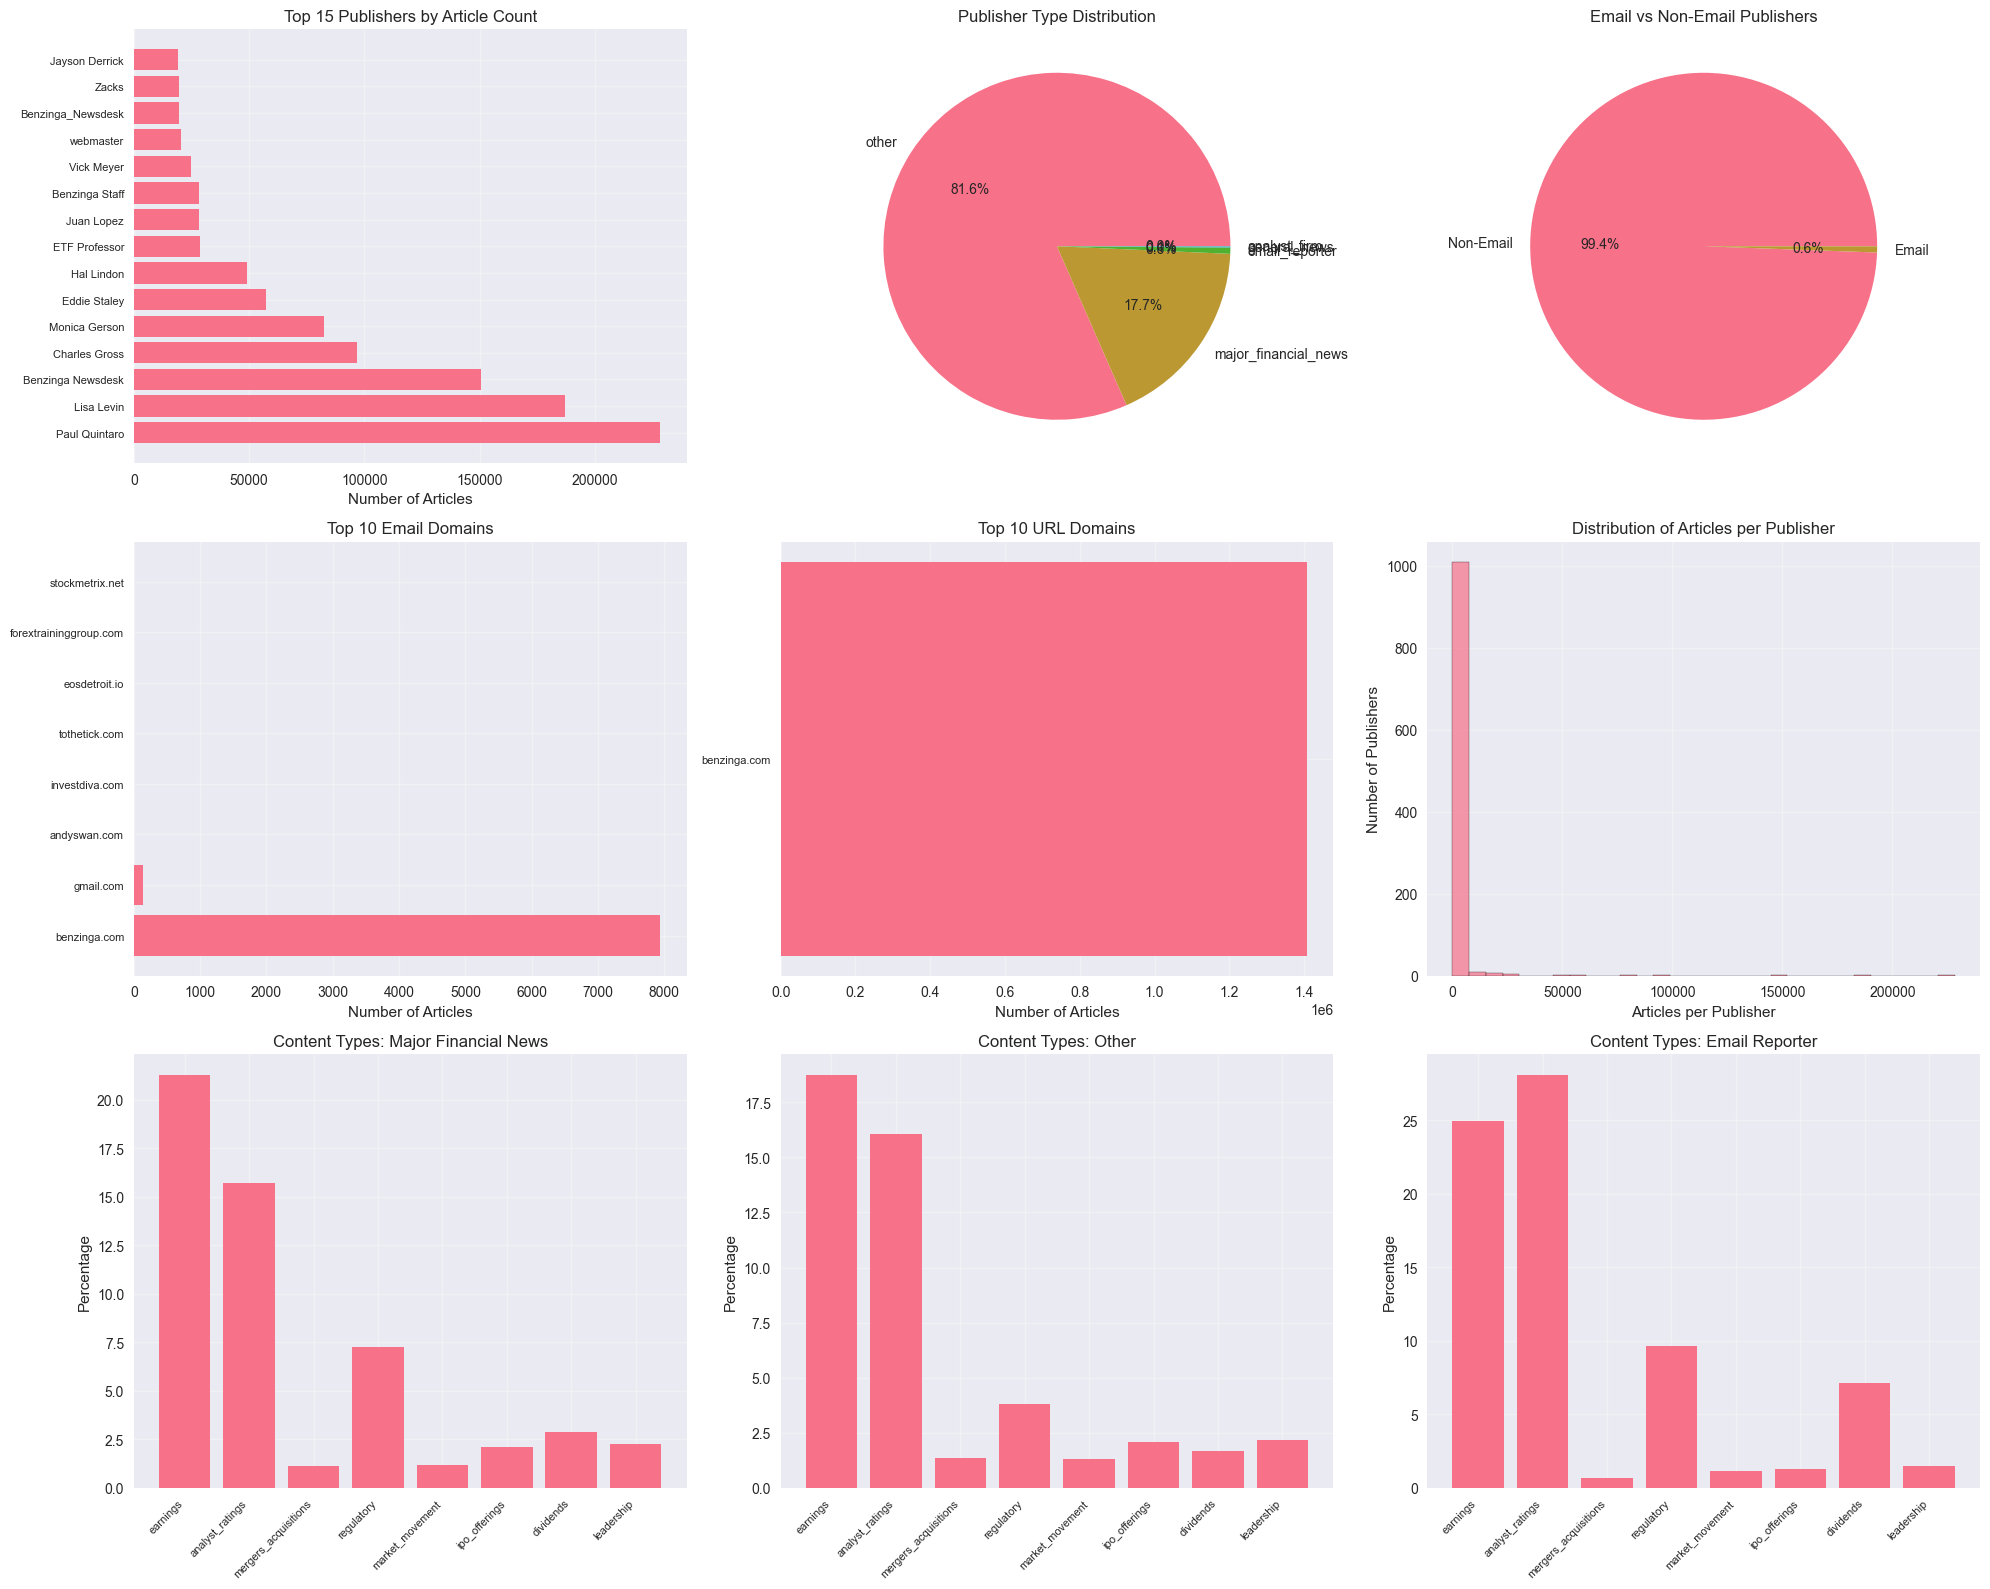

In [174]:
# Comprehensive publisher analysis visualizations
publisher_analyzer.plot_publisher_analysis(figsize=(20, 16))

## 10. Stock Symbol Analysis

Top 25 Most Mentioned Stocks:
 1. MRK      |     3.3K articles ( 0.24%)
 2. MS       |     3.2K articles ( 0.23%)
 3. NVDA     |     3.1K articles ( 0.22%)
 4. MU       |     3.1K articles ( 0.22%)
 5. QQQ      |     3.1K articles ( 0.22%)
 6. NFLX     |     3.0K articles ( 0.22%)
 7. M        |     3.0K articles ( 0.21%)
 8. EBAY     |     3.0K articles ( 0.21%)
 9. GILD     |     3.0K articles ( 0.21%)
10. VZ       |     3.0K articles ( 0.21%)
11. QCOM     |     2.9K articles ( 0.21%)
12. JNJ      |     2.9K articles ( 0.21%)
13. DAL      |     2.9K articles ( 0.21%)
14. BABA     |     2.9K articles ( 0.20%)
15. KO       |     2.8K articles ( 0.20%)
16. AA       |     2.7K articles ( 0.19%)
17. EWU      |     2.7K articles ( 0.19%)
18. ORCL     |     2.7K articles ( 0.19%)
19. FDX      |     2.6K articles ( 0.19%)
20. WFC      |     2.6K articles ( 0.19%)
21. HD       |     2.6K articles ( 0.19%)
22. BBRY     |     2.6K articles ( 0.18%)
23. BMY      |     2.5K articles ( 0.18%)
24. 

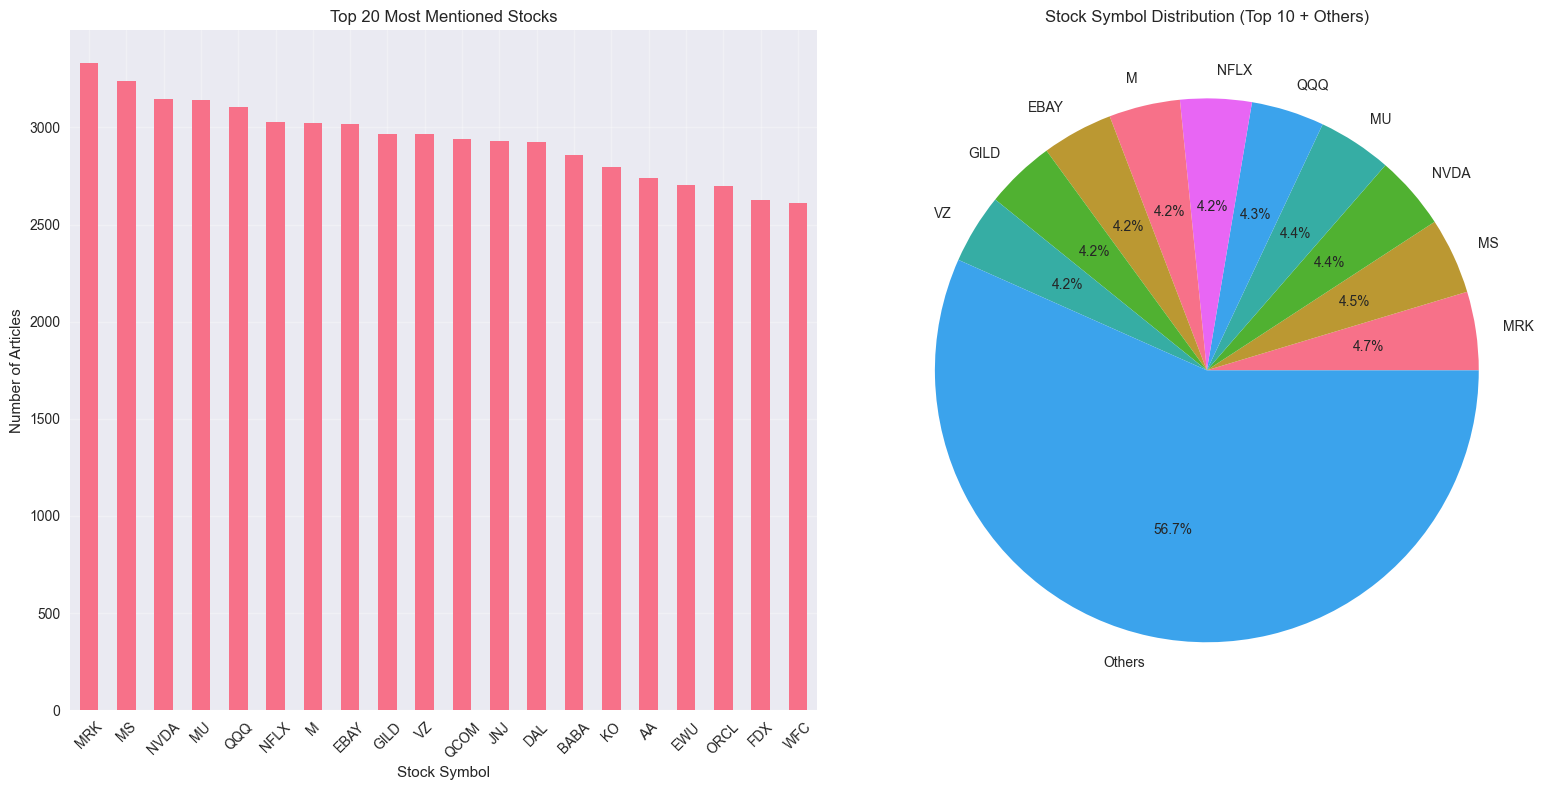

Stock Symbol Statistics:
Total Unique Stocks: 6204
Total Articles: 1.4M
Average Articles per Stock: 226.84


In [177]:
# Analyze stock symbol distribution
if 'stock' in df.columns:
    stock_counts = df['stock'].value_counts().head(25)
    print("Top 25 Most Mentioned Stocks:")
    print("=" * 35)
    for idx, (stock, count) in enumerate(stock_counts.items(), 1):
        percentage = (count / len(df)) * 100
        print(f"{idx:2d}. {stock:<8} | {format_large_numbers(count):>8} articles ({percentage:>5.2f}%)")
    # Plot top stocks
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    stock_counts.head(20).plot(kind='bar')
    plt.title('Top 20 Most Mentioned Stocks')
    plt.xlabel('Stock Symbol')
    plt.ylabel('Number of Articles')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    # Stock distribution pie chart (top 10)
    plt.subplot(1, 2, 2)
    top_10_stocks = stock_counts.head(10)
    other_stocks = stock_counts.iloc[10:].sum()
    pie_data = list(top_10_stocks.values) + [other_stocks]
    pie_labels = list(top_10_stocks.index) + ['Others']
    plt.pie(pie_data, labels=pie_labels, autopct='%1.1f%%')
    plt.title('Stock Symbol Distribution (Top 10 + Others)')
    plt.tight_layout()
    plt.show()
    print(f"Stock Symbol Statistics:")
    print(f"Total Unique Stocks: {df['stock'].nunique()}")
    print(f"Total Articles: {format_large_numbers(len(df))}")
    print(f"Average Articles per Stock: {len(df) / df['stock'].nunique():.2f}")
else:
    print("Stock column not found in dataset")

## 11. Comprehensive Summary and Key Insights

In [179]:
# Generate comprehensive summary
comprehensive_summary = {
    'dataset_overview': {
        'total_articles': len(df),
        'total_publishers': len(df['publisher'].unique()) if 'publisher' in df.columns else 0,
        'date_range': {
            'start': str(df['date'].min()) if 'date' in df.columns else 'N/A',
            'end': str(df['date'].max()) if 'date' in df.columns else 'N/A'
        },
        'unique_stocks': len(df['stock'].unique()) if 'stock' in df.columns else 0
    },
    'text_analysis': text_analyzer.get_comprehensive_text_analysis(),
    'time_series_analysis': ts_analyzer.get_comprehensive_time_series_analysis(),
    'publisher_analysis': publisher_analyzer.get_comprehensive_publisher_analysis(),
    'data_quality': quality_report
}

# Save comprehensive results
save_analysis_results(comprehensive_summary, '../results/comprehensive_eda_analysis.json')

print("Comprehensive Financial News EDA Analysis Summary:")
print("=" * 55)

overview = comprehensive_summary['dataset_overview']
print(f"\nDataset Overview:")
print(f"  Total Articles: {format_large_numbers(overview['total_articles'])}")
print(f"  Total Publishers: {format_large_numbers(overview['total_publishers'])}")
print(f"  Unique Stocks: {format_large_numbers(overview['unique_stocks'])}")
print(f"  Date Range: {overview['date_range']['start']} to {overview['date_range']['end']}")

# Key insights from text analysis
print(f"\nKey Text Analysis Insights:")
text_summary = comprehensive_summary['text_analysis']
if text_summary['top_keywords']:
    top_keyword = text_summary['top_keywords'][0]
    print(f"  Most Common Keyword: '{top_keyword['keyword']}' ({top_keyword['frequency']} occurrences)")

sentiment_dist = text_summary['sentiment_analysis']['sentiment_distribution']
if sentiment_dist:
    total_sentiment = sum(sentiment_dist.values())
    print(f"  Sentiment Distribution:")
    for sentiment, count in sentiment_dist.items():
        pct = (count / total_sentiment) * 100 if total_sentiment > 0 else 0
        print(f"    {sentiment.title()}: {count} articles ({pct:.1f}%)")

# Key insights from time series analysis
print(f"\nKey Time Series Insights:")
ts_summary = comprehensive_summary['time_series_analysis']
freq_data = ts_summary['publication_frequency']['daily']
print(f"  Average Daily Articles: {freq_data['avg_daily']:.1f}")
print(f"  Peak Publishing Day: {freq_data['max_daily']} articles")

spike_data = ts_summary['spike_analysis']
print(f"  Spike Days Detected: {spike_data['total_spike_days']} ({spike_data['spike_percentage']:.1f}% of days)")

intraday_data = ts_summary['intraday_patterns']
print(f"  Market Hours Articles: {intraday_data['market_hours_percentage']:.1f}% of total")

# Key insights from publisher analysis
print(f"\nKey Publisher Analysis Insights:")
pub_summary = comprehensive_summary['publisher_analysis']
pub_activity = pub_summary['publisher_activity']
print(f"  Total Publishers: {format_large_numbers(pub_activity['total_publishers'])}")
print(f"  Email-based Publishers: {pub_activity['email_publisher_stats']['email_percentage']:.1f}%")

top_pub_type = max(pub_activity['publisher_type_distribution'].items(), key=lambda x: x[1])
print(f"  Most Common Publisher Type: {top_pub_type[0].replace('_', ' ').title()} ({format_large_numbers(top_pub_type[1])} articles)")

print("\n" + "=" * 55)
print("Analysis completed successfully!")
print("Results saved to:")
print("  - ../results/comprehensive_eda_analysis.json")

print("\nThis analysis provides insights into:")
print("  ✓ Text patterns and financial keywords")
print("  ✓ Publication timing and market event detection")
print("  ✓ Publisher behavior and content types")
print("  ✓ Sentiment trends in financial news")
print("  ✓ Temporal patterns crucial for trading systems")

Comprehensive Financial News EDA Analysis Summary:

Dataset Overview:
  Total Articles: 1.4M
  Total Publishers: 1.0K
  Unique Stocks: 6.2K
  Date Range: 2009-02-14 00:00:00 to 2020-06-11 17:12:35-04:00

Key Text Analysis Insights:
  Most Common Keyword: 'stocks' (161776 occurrences)
  Sentiment Distribution:
    Positive: 327311 articles (66.5%)
    Negative: 95059 articles (19.3%)
    Neutral: 69860 articles (14.2%)

Key Time Series Insights:
  Average Daily Articles: 22.1
  Peak Publishing Day: 973 articles
  Spike Days Detected: 51 (2.0% of days)
  Market Hours Articles: 63.2% of total

Key Publisher Analysis Insights:
  Total Publishers: 1.0K
  Email-based Publishers: 0.6%
  Most Common Publisher Type: Other (1.1M articles)

Analysis completed successfully!
Results saved to:
  - ../results/comprehensive_eda_analysis.json

This analysis provides insights into:
  ✓ Text patterns and financial keywords
  ✓ Publication timing and market event detection
  ✓ Publisher behavior and conte